- 데이터: MNIST 데이터 사용
- 학습모델 : 신경망 모델
- 동작: 0~9 사이 숫자 판별

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split

# [1] 데이터 로딩 및 준비

In [2]:
(x_train,y_train), (x_test, y_test) = load_data()

In [3]:
print(f'x_train.shape: {x_train.shape}, x_test.shape:{x_test.shape}')
print(f'y_train.shape: {y_train.shape}, y_test.shape:{y_test.shape}')

x_train.shape: (60000, 28, 28), x_test.shape:(10000, 28, 28)
y_train.shape: (60000,), y_test.shape:(10000,)


In [4]:
# 검증용 데이터셋 준비
x_train,x_val,y_train,y_val =train_test_split(x_train,y_train, stratify =y_train)

In [5]:
print(f'x_train.shape: {x_train.shape}, x_val.shape:{x_test.shape}')
print(f'y_train.shape: {y_train.shape}, y_val.shape:{y_test.shape}')

x_train.shape: (45000, 28, 28), x_val.shape:(10000, 28, 28)
y_train.shape: (45000,), y_val.shape:(10000,)


# [2] 데이터 전처리
---
    - 수치형 데이터 => 스케일링
    - 범주형 데이터 => 원핫인코딩

In [6]:
# 저장된 값 확인
x_train[0],y_train[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   5,   2,   0,   0,   0,   0,   0, 126, 131,   0,   0,   0,
           0

In [7]:
# 이미지 데이터의 픽셀값 즉 특성(Feature) 0.0 ~ 1.0으로 스케일링
x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0

In [8]:
# 타켓 라벨 => OneHotEncoding으로 변환
from sklearn.preprocessing import OneHotEncoder

In [9]:
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train.reshape(-1,1))
y_val = encoder.fit_transform(y_val.reshape(-1,1))
y_test = encoder.fit_transform(y_test.reshape(-1,1))

In [10]:
type(y_train)

scipy.sparse._csr.csr_matrix

In [11]:
y_train = y_train.toarray()
y_val = y_val.toarray()
y_test = y_test.toarray()

In [12]:
print(f'y_train : {type(y_train)}\ny_train[0]: {y_train[0]}')

y_train : <class 'numpy.ndarray'>
y_train[0]: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# [3] 모델 생성
- (1) 모델 구성
- (2) 모델 생성

#### [3-1] 모델 구성
    - 입력 데이터 : 784 => 28*28 이미지 데이터
    - 출력 데이터 : 10  => 0 ~ 9 숫자 라벨
    - 학 습 방 법 : 분류 중에서 다중 분류

In [13]:
model = Sequential(name = 'MINST_NNModel')

In [14]:
# Layer 생성 => Node(퍼셉트론, 뉴런) 갯수, 활성화함수, 
# [옵] input_shape param

model.add(Dense(30, activation = 'relu', input_shape=(784,)))

In [15]:
# 출력 Layer 생성 => Node(퍼셉트론, 뉴런) 갯수, 활성화함수
model.add(Dense(10, activation ='softmax'))

In [16]:
model.summary()

Model: "MINST_NNModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                23550     
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


#### [3-2] 모델 생성
---
    - loss함수 => crossentropy
      - 이진분류 : binary_crossentropy
      - 다중분류 : sparse_categoriacl_crossentropy, categorical_crossentropy
    - optimizer기법 => 'rmsprop'
    - matrics 평가항목 => 'loss' 

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

#### [4] 학습

In [18]:
# 데이터를 1차원으로 펴줘야 함 (45000,28,28) -> (45000,784)
x_train.shape

(45000, 28, 28)

In [19]:
x_train = x_train.reshape(-1,28*28)
x_val = x_val.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)
x_train.shape, y_train.shape

((45000, 784), (45000, 10))

In [20]:
# 데이터를 1차원으로 펴줘야 함
his = model.fit(x_train,y_train, 
                epochs=10,
                validation_data = (x_val,y_val))

Epoch 1/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4056 - accuracy: 0.8863 - val_loss: 0.2558 - val_accuracy: 0.9260
Epoch 2/10
1407/1407 [==============================] - 2s 2ms/step - loss: 0.2145 - accuracy: 0.9384 - val_loss: 0.1986 - val_accuracy: 0.9434
Epoch 3/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.1700 - accuracy: 0.9501 - val_loss: 0.1743 - val_accuracy: 0.9487
Epoch 4/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.1459 - accuracy: 0.9573 - val_loss: 0.1669 - val_accuracy: 0.9520
Epoch 5/10
1407/1407 [==============================] - 2s 2ms/step - loss: 0.1288 - accuracy: 0.9617 - val_loss: 0.1535 - val_accuracy: 0.9551
Epoch 6/10
1407/1407 [==============================] - 2s 2ms/step - loss: 0.1152 - accuracy: 0.9658 - val_loss: 0.1517 - val_accuracy: 0.9557
Epoch 7/10
1407/1407 [==============================] - 2s 2ms/step - loss: 0.1039 - accuracy: 0.9695 - val_loss: 0.1490 - val_accuracy:

In [21]:
# 학습 진행 결과 시각화
import matplotlib.pyplot as plt 

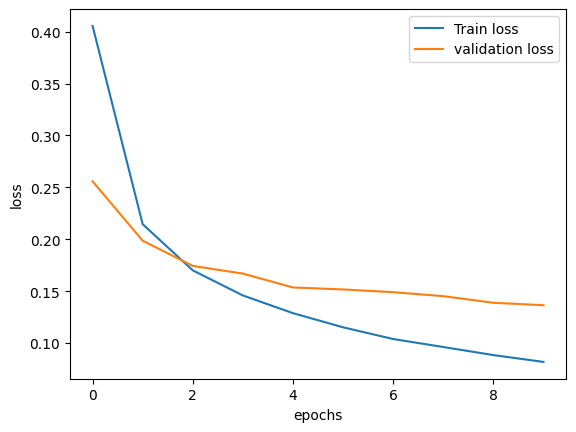

In [22]:
# loss 비교
plt.plot(his.epoch, his.history['loss'],label='Train loss')
plt.plot(his.epoch, his.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

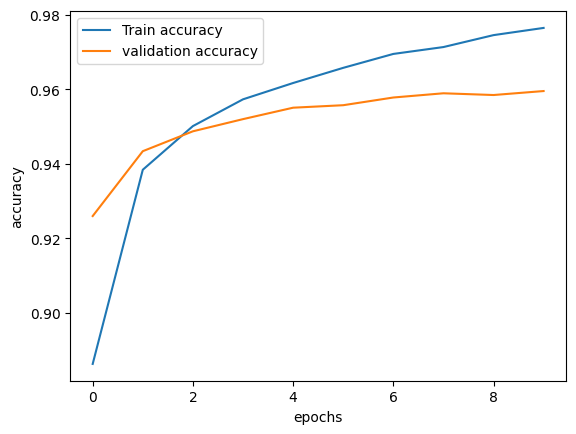

In [23]:
plt.plot(his.epoch, his.history['accuracy'],label='Train accuracy')
plt.plot(his.epoch, his.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

stopCB = EarlyStopping(monitor='val_loss', patience=2)

his=model.fit(x_train, y_train, epochs=10, )

#### [5] 평가

####[6] 테스트/예측